<a href="https://colab.research.google.com/github/Pdugovich/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


## Confidence Intervals

### 1) Generate and numerically represent a confidence interval

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-09-17 23:58:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2019-09-17 23:58:30 (629 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



In [0]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=names)
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df = df.replace({'?': np.NaN, 'y':1, 'n': 0})

In [0]:
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [0]:
dem['aid-to-contras'].mean()

#Dropping nas to use with function
dem_contras = dem['aid-to-contras'].dropna()

In [0]:
def sample_confidence_interval(data, confidence_level=0.95):
  data = np.array(data)
  mean = sum(data) / len(data)
  std_error = np.std(data, ddof=1) / (len(data))**(1/2)
  t_value = stats.t.ppf((1 + confidence_level) / 2.0, len(data) - 1)
  margin = t_value * std_error
  return (mean, mean - margin, mean + margin)

In [8]:
#Checking to make sure the code works
sample_confidence_interval(dem_contras)

(0.8288973384030418, 0.7830845214499412, 0.8747101553561424)

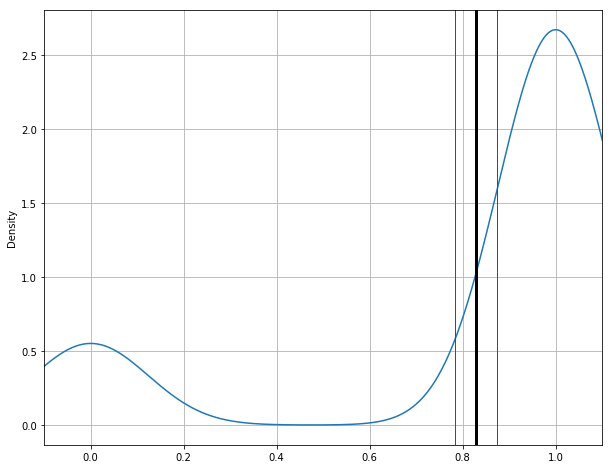

In [32]:
# I tried a few different styles, but I liked Ryan's graphical
#representation best
dem_contras.plot(kind='density', figsize=(10,8))
#zooming in to get a better view, the margin of error is pretty small
plt.xlim(left = -0.1, right=1.1)
plt.grid()
CI = sample_confidence_interval(dem_contras)
plt.axvline(x=CI[1], color='red', lw=1)
plt.axvline(x=CI[2], color='red', lw=1)
plt.axvline(x=CI[0], color='black', lw=3);

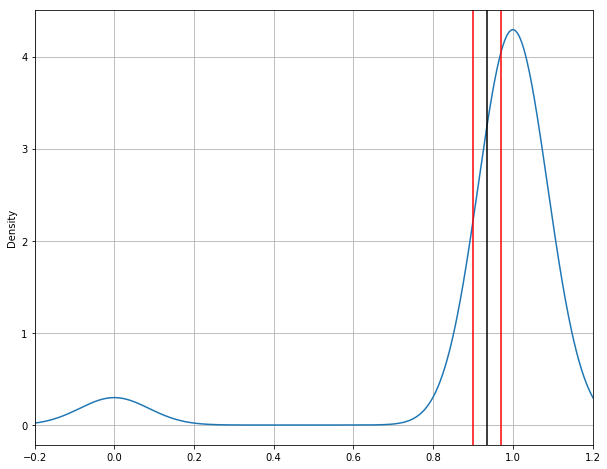

In [21]:
dem['south-africa'].dropna().plot(kind='density', figsize=(10,8))
CI = sample_confidence_interval(dem['south-africa'].dropna())
plt.xlim(left=-.2, right=1.2)
plt.grid()
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='black');

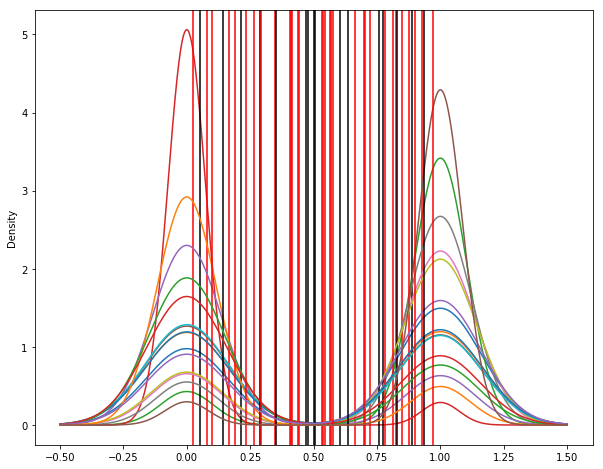

In [15]:
#This graph serves no purpose, and should be ignored. But it looks cool.
for issue in df.columns[range(1,17)]:
  dem[issue].dropna().plot(kind='density', figsize=(10,8))
  CI = sample_confidence_interval(dem[issue].dropna())
  plt.axvline(x=CI[1], color='red')
  plt.axvline(x=CI[2], color='red')
  plt.axvline(x=CI[0], color='black');

##Chi-squared Test

In [34]:
# Loading in a dataset from a previous lecture

dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

column_headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                 'capital-gain', 'capital-loss', 'hours-per-week', 
                 'native-country', 'income']
#Note that having the incorrect number of column headers makes the far left the "index", 

df_chi = pd.read_csv(dataset_url, names=column_headers)
print(df.shape)
df_chi.head(5)


(435, 17)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [35]:
df_chi['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [36]:
df_chi['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [0]:
#Putting the two categorical variables into a crosstab
crosstab_table = pd.crosstab(df_chi['sex'], df_chi['race'], margins=True)

In [38]:
crosstab_table

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
sex,,,,,,
Female,119,346,1555,109,8642,10771
Male,192,693,1569,162,19174,21790
All,311,1039,3124,271,27816,32561


In [39]:
row_sums = crosstab_table.iloc[0:2, 5].values
col_sums = crosstab_table.iloc[2, 0:5].values
total = crosstab_table.loc['All','All']
print(row_sums)
print(col_sums)
print(total)

[10771 21790]
[  311  1039  3124   271 27816]
32561


In [0]:
#Creating an empty list to fill with expected values
expected = []
for num in range(len(row_sums)):
  expected_row = []
  for col in col_sums:
    expected_val = col*row_sums[num]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  

expected = np.array(expected)

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)